<a href="https://colab.research.google.com/github/venkatesh-eranti/classification_milestone_project/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# problem Statement: 
In our case, the problem we will be exploring is binary classification.<br> 
This is because we're going to be using a number of differnet features  about a person to predict whether they have heart disease or not.<br>

statement: <br>

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# Reading and understanding the data

## Heart Disease Data Dictionary
The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type<br>
    * 0: Typical angina: chest pain related decrease blood supply to the heart<br>
    * 1: Atypical angina: chest pain not related to heart<br>
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)<br>
    * 3: Asymptomatic: chest pain not showing signs of disease<br>
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)<br>
    * anything above 130-140 is typically cause for concern<br>
5. chol - serum cholestoral in mg/dl<br>
    * serum = LDL + HDL + .2 * triglycerides<br>
    * above 200 is cause for concern<br>
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results<br>
    * 0: Nothing to note<br>
    * 1: ST-T Wave abnormality<br>
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat<br>
    * 2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber<br>
8. thalach - maximum heart rate achieved<br>
9. exang - exercise induced angina (1 = yes; 0 = no)<br>
10. oldpeak - ST depression induced by exercise relative to rest<br>
    * looks at stress of heart during excercise<br>
    * unhealthy heart will stress more<br>
11. slope - the slope of the peak exercise ST segment<br>
    * 0: Upsloping: better heart rate with excercise (uncommon)<br>
    * 1: Flatsloping: minimal change (typical healthy heart)<br>
    * 2: Downslopins: signs of unhealthy heart<br>
12. ca - number of major vessels (0-3) colored by flourosopy<br>
    * colored vessel means the doctor can see the blood passing through<br>
    * the more blood movement the better (no clots)<br>
13. thal - thalium stress result<br>
    * 1,3: normal<br>
    * 6: fixed defect: used to be defect but ok now<br>
    * 7: reversable defect: no proper blood movement when excercising<br>
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## importing the required librariers

In [85]:
# reading and processing the data
import numpy as np
import pandas as pd
# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
# supress the warnings
import warnings
warnings.filterwarnings('ignore')
# splitting the data in to train and test
from sklearn.model_selection import train_test_split
# rescaling the features
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# to build a model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# feature selection
from sklearn.feature_selection import RFE
# model evaluations
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,plot_roc_curve,confusion_matrix,classification_report,f1_score,plot_confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV

## loading the data

In [86]:
df=pd.read_csv('https://raw.githubusercontent.com/venkatesh-eranti/classification_milestone_project/main/heart.csv')

## understanding the data

In [87]:
df.shape #(rows, columns)

(303, 14)

In [88]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [90]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


seems there are no missing values and all are numerical in nature

# Visualising the data

## checking the proportion of `target` variables

In [92]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [93]:
df['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

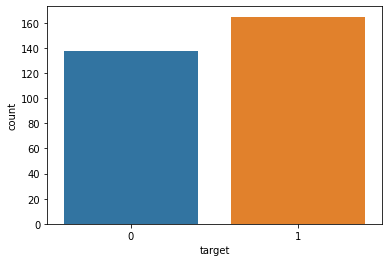

In [94]:
sns.countplot(df['target']);

seems this is a balanced distribution if the data was unbalanced we should more concentrate to increase `macro avg` from classification report

## checking heart disease frequency as per Gender

In [95]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

there are 207 males and 96 females in this study

In [96]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


### observations:
1. Since there are 96 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 75% chance she has heart disease. <br>

2. As for males, there 207 with around half indicating a presence of heart disease. So we might predict, if the participant is male, 45% of the time he will have heart disease.<br>

3. Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 60% chance they have heart disease.<br>

This can be our very simple baseline, we'll try to beat it with machine learning.

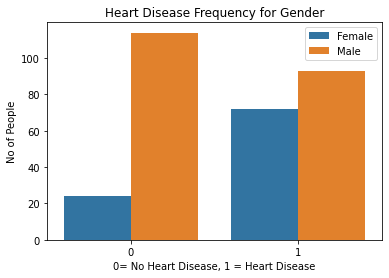

In [97]:
sns.countplot(df['target'],hue=df['sex'])
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('0= No Heart Disease, 1 = Heart Disease')
plt.ylabel('No of People')
plt.legend(['Female','Male'])

## Age VS Max heart rate (thalach)

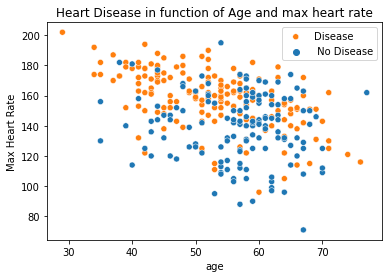

In [98]:
sns.scatterplot(x=df['age'],y=df['thalach'],hue=df['target'])
plt.title('Heart Disease in function of Age and max heart rate')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease',' No Disease'])

### Observations:

1. It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more blue dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).<br>

2. Both of these are observational of course, but this is what we're trying to do, build an understanding of the data. <br>

Let's check the age distribution.

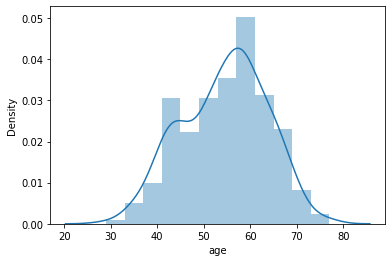

In [99]:
sns.distplot(df['age'])

We can see it's a normal distribution but slightly moving to the right, which reflects in the scatter plot above

## frequency per chest pain `cp`

In [100]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


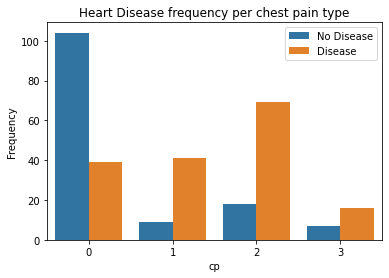

In [101]:
sns.countplot(df['cp'],hue=df['target'])
plt.title('Heart Disease frequency per chest pain type')
plt.ylabel('Frequency')
plt.legend(['No Disease','Disease'])

### observations:
It's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.<br> 

According to one [heart institute general](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2763472/), it seems even some medical professionals are confused by the term.<br>

Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.<br>

Although not conclusive, this graph above is a hint at the confusion of defintions being represented in data.

# correlation matrix

In [102]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


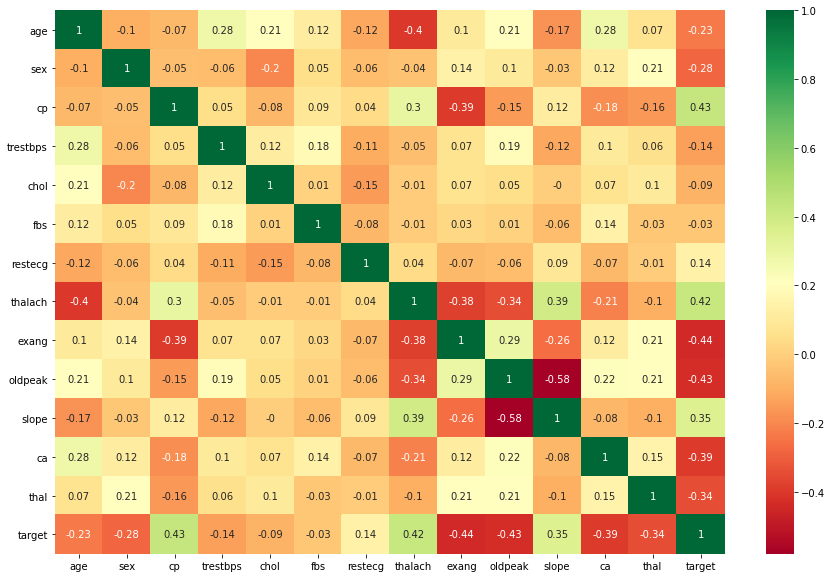

In [103]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.corr(),2),annot=True,cmap='RdYlGn')

# splitting train and test split

In [104]:
df_train,df_test=train_test_split(df,train_size=0.8,random_state=42)

In [105]:
df_train.shape,df_test.shape

((242, 14), (61, 14))

In [106]:
x_train=df_train.drop('target',axis=1)
y_train=df_train['target']

In [107]:
x_test=df_test.drop('target',axis=1)
y_test=df_test['target']

# model Building

## checking ml map
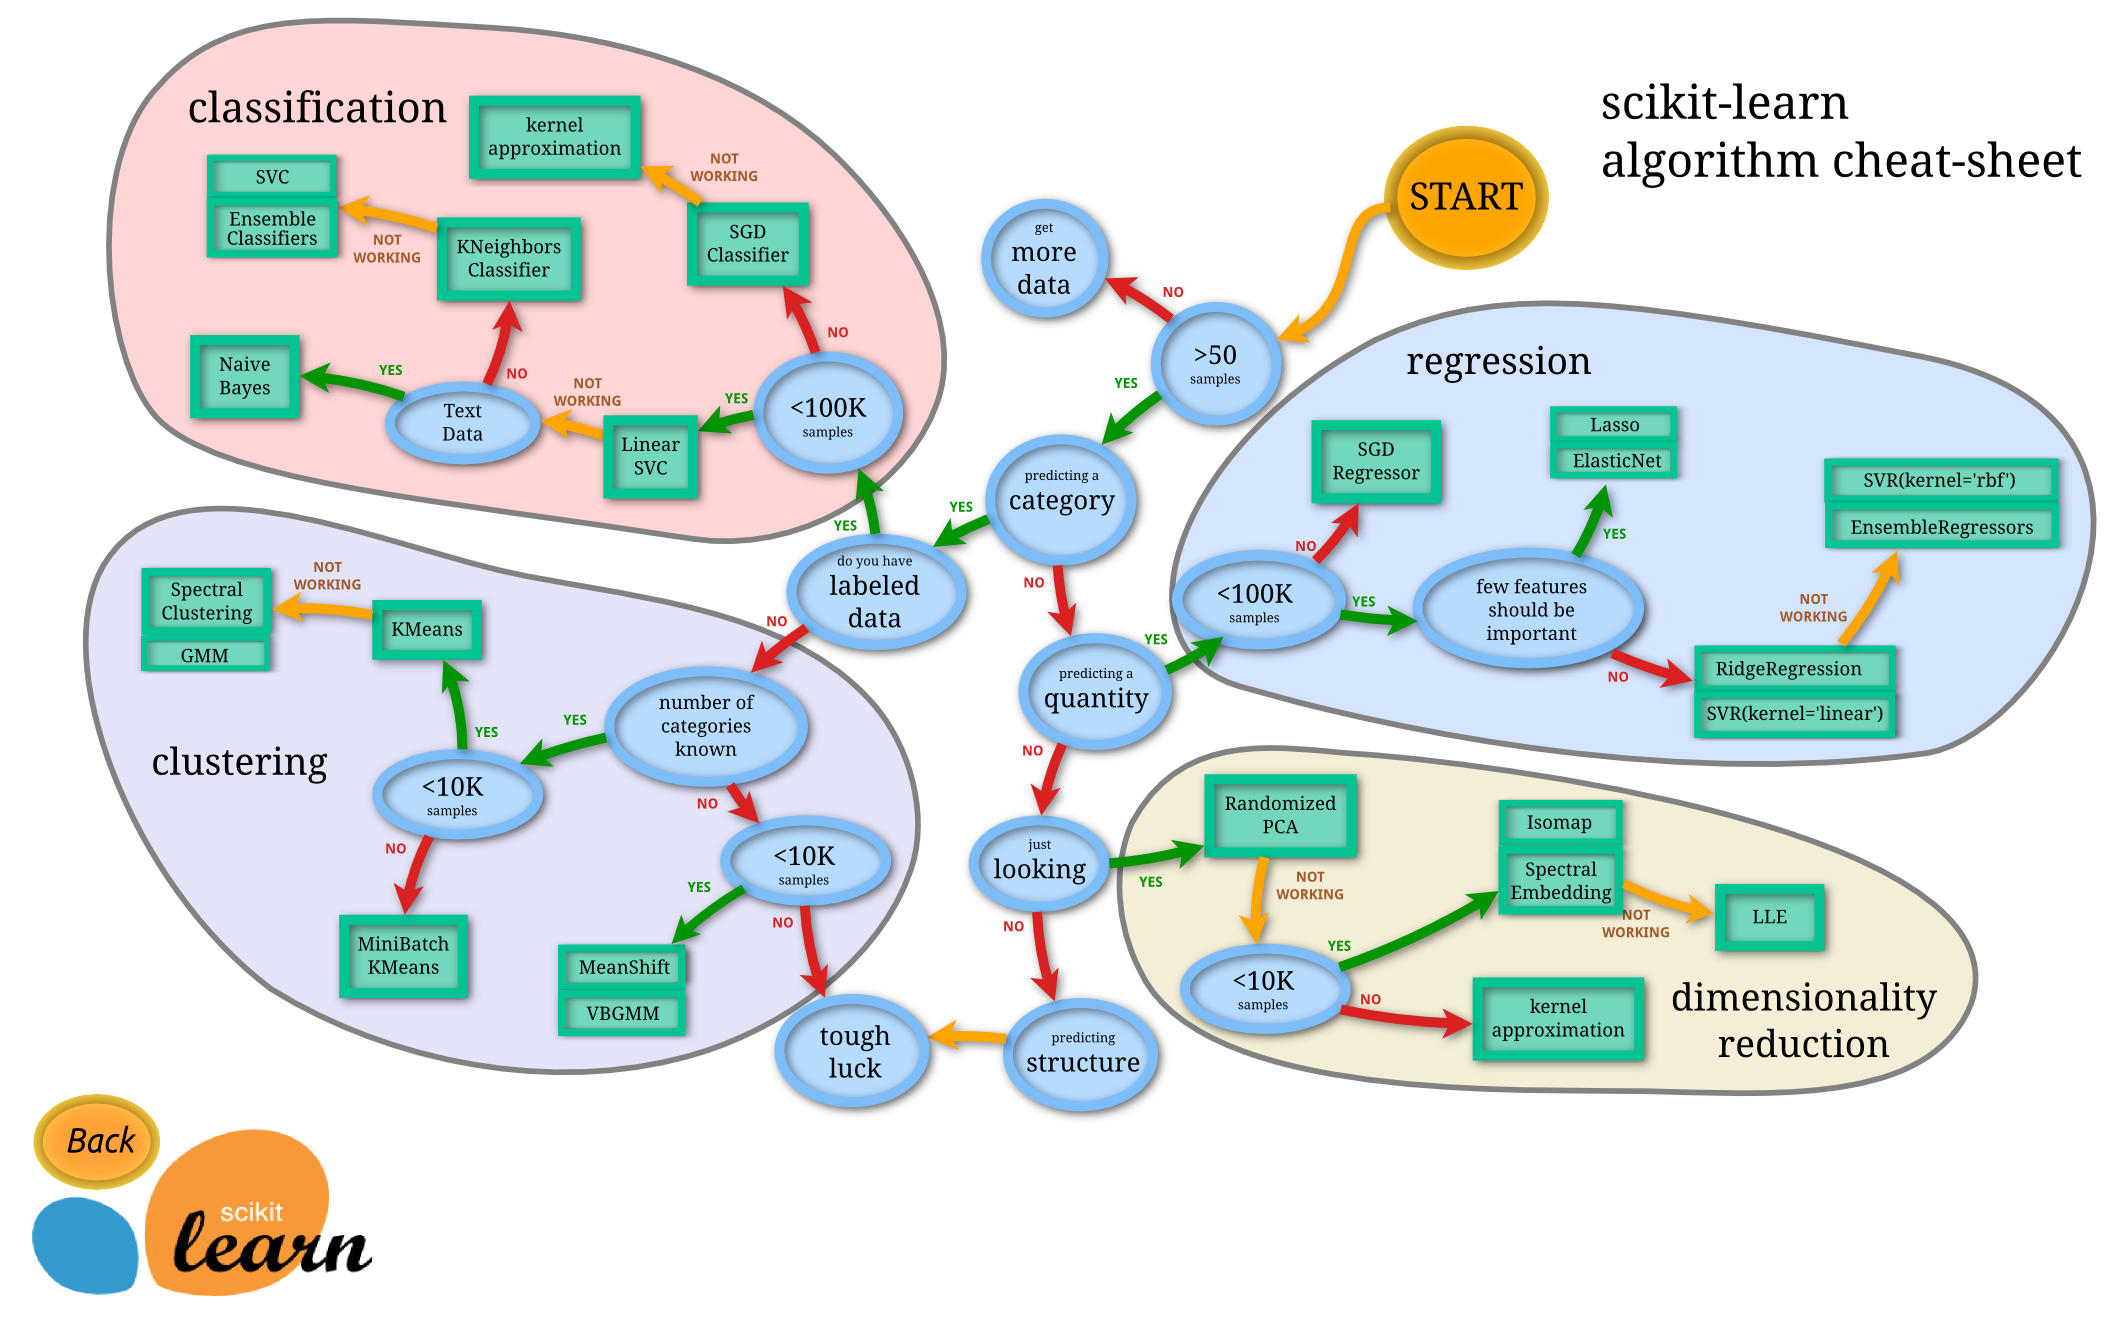

## picking the right algorith flow from sklearn ML map
as per ML map of sklearn: <br>
1) samples more than 50 $\rightarrow$ Yes <br>
2) predicting a category $\rightarrow$ Yes <br>
3) do you have a labeled data $\rightarrow$ Yes <br>
4) samples <100K $\rightarrow$ Yes <br>
5) as per map first we will build model with `Linear SVC` <br>
6) then compare evaluation metrics with Linear `SVC` and `KNeighbors` and then we will build `RandomForestclassifier` from ensemble classifiers and `SVC` with rbf as kernel <br>
7) Finally we will pick the best one which has better metrics

## creating function to build model with [Estimator score method](https://scikit-learn.org/stable/modules/model_evaluation.html) metric

1. by default score method will pick accuracy score for classification and r2_score for regression.
2. in this case i will make a function and measure all the models with basic metric and then fine tune the parameters to check if we get any betterment in our metrics

## building all models with a single funtion

In [108]:
models = {'Logistic Regression': LogisticRegression(),
          'Linear SVC':SVC(kernel='linear'),
          'KNN': KNeighborsClassifier(),
          'kernel SVC':SVC(), 
          'Random Forest': RandomForestClassifier()}
def fit_and_score(models, x_train, y_train, x_test, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [109]:
model_scores=fit_and_score(models, x_train, y_train, x_test, y_test)
model_scores

{'KNN': 0.6885245901639344,
 'Linear SVC': 0.8688524590163934,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'kernel SVC': 0.7049180327868853}

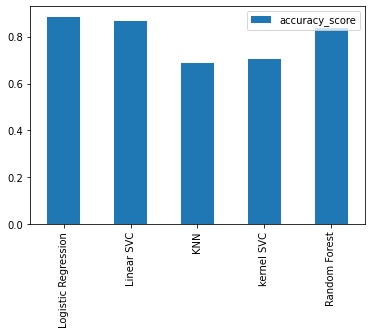

In [110]:
model_compare = pd.DataFrame(model_scores, index=['accuracy_score'])
model_compare.T.plot.bar()

KNN algoithm is performing wosrt here dut to this data is not rescaled/ Normalised.<br>
so to build this KNN model i will use Rescaled data 

## Model Building with Logistic Regression using Statsmodels

In [111]:
log_reg=sm.Logit(y_train,sm.add_constant(x_train)).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.348242
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                           13
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.4940
Time:                        04:35:53   Log-Likelihood:                -84.274
converged:                       True   LL-Null:                       -166.55
Covariance Type:            nonrobust   LLR p-value:                 2.359e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8752      2.927      1.324      0.185      -1.861       9.611
age           -0.0088      0.025     -0.349      0.727      -0.058       0.041
sex           -1.7810      0.522     -3.411      0.001      -2.804      -0.758
cp             0.8601      0.212      4.048      0.000       0.444       1.277
trestbps      -0.0177      0.012     -1.509      0.131      -0.041       0.005
chol          -0.0038      0.004     -0.924      0.356      -0.012       0.004
fbs            0.2943      0.638      0.461      0.645      -0.957       1.546
restecg        0.5916      0.396      1.493      0.135      -0.185       1.368
thalach        0.0187      0.012      1.542      0.123      -0.005       0.042
exang         -1.1585      0.461     -2.513      0.012      -2.062      -0.255
oldpeak       -0.6590      0.256     -2.576      0.010      -1.160      -0.158
slope          0.7640      0.396      1.931      0.053      -0.011       1.539
ca            -0.8574      0.227     -3.773      0.000      -1.303      -0.412
thal          -1.0070      0.344     -2.928      0.003      -1.681      -0.333
==============================================================================
"""

as we can see from stats summary table there are 7 statistically insignificant features in the model.
* so, there is multicollinearity in the model. as logistic regression is affected by it we need to remove those statistically insignificant features.
* i will use RFE (recursive feature elimination technique from SKlearn and fine tune the algorithm 


In [112]:
log_reg_sk=LogisticRegression()

In [113]:
rfe=RFE(log_reg_sk,8)
rfe_log_reg_sk=rfe.fit(x_train,y_train)

In [114]:
x_train.columns[rfe_log_reg_sk.support_]

Index(['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')

## bulding a model again with the rfe's chosen features

In [115]:
x_train_rfe=x_train[x_train.columns[rfe_log_reg_sk.support_]]
x_test_rfe=x_test[x_test.columns[rfe_log_reg_sk.support_]]

In [116]:
log_reg1=sm.Logit(y_train,sm.add_constant(x_train_rfe)).fit()
log_reg1.summary()

Optimization terminated successfully.
         Current function value: 0.361192
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      233
Method:                           MLE   Df Model:                            8
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.4752
Time:                        04:35:54   Log-Likelihood:                -87.408
converged:                       True   LL-Null:                       -166.55
Covariance Type:            nonrobust   LLR p-value:                 3.656e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9359      1.048      2.801      0.005       0.881       4.991
sex           -1.3669      0.452     -3.026      0.002      -2.252      -0.482
cp             0.9113      0.204      4.462      0.000       0.511       1.312
restecg        0.6999      0.379      1.846      0.065      -0.043       1.443
exang         -1.3927      0.434     -3.209      0.001      -2.243      -0.542
oldpeak       -0.8121      0.249     -3.261      0.001      -1.300      -0.324
slope          0.7129      0.371      1.920      0.055      -0.015       1.441
ca            -0.8864      0.212     -4.171      0.000      -1.303      -0.470
thal          -1.0015      0.331     -3.028      0.002      -1.650      -0.353
==============================================================================
"""

significance of coefficinets are reasonable. lets check multicoolinearity using Variance inflation factor

In [117]:
vif=pd.Series([variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])],index=x_train_rfe.columns)
vif

sex         3.174961
cp          2.086767
restecg     2.079789
exang       1.883483
oldpeak     2.722319
slope       6.446752
ca          1.623606
thal       10.701438
dtype: float64

as `restecg` feature has high p-value lets remove that feature and check the model again

In [118]:
x_train_restecg=x_train_rfe.drop('restecg',axis=1)
x_test_restecg=x_test_rfe.drop('restecg',axis=1)

In [119]:
log_reg2=sm.Logit(y_train,sm.add_constant(x_train_restecg)).fit()
log_reg2.summary()

Optimization terminated successfully.
         Current function value: 0.368415
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      234
Method:                           MLE   Df Model:                            7
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.4647
Time:                        04:35:54   Log-Likelihood:                -89.157
converged:                       True   LL-Null:                       -166.55
Covariance Type:            nonrobust   LLR p-value:                 4.008e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0623      1.042      2.940      0.003       1.021       5.104
sex           -1.3828      0.451     -3.066      0.002      -2.267      -0.499
cp             0.8724      0.200      4.369      0.000       0.481       1.264
exang         -1.3433      0.429     -3.130      0.002      -2.185      -0.502
oldpeak       -0.7502      0.244     -3.080      0.002      -1.228      -0.273
slope          0.7440      0.368      2.023      0.043       0.023       1.465
ca            -0.8640      0.210     -4.108      0.000      -1.276      -0.452
thal          -0.9252      0.324     -2.852      0.004      -1.561      -0.289
==============================================================================
"""

all coefficients are statistically significant<br>
lets check VIF again

In [120]:
vif2=pd.Series([variance_inflation_factor(x_train_restecg.values,i) for i in range(x_train_restecg.shape[1])],index=x_train_restecg.columns)
vif2

sex         3.167257
cp          2.082055
exang       1.883446
oldpeak     2.699789
slope       6.293897
ca          1.620972
thal       10.301006
dtype: float64

## lets build logistic regression by using Sklearn to check evaluation of metrics

In [121]:
log_reg_final=LogisticRegression()
log_reg_final.fit(x_train_restecg,y_train)
log_reg_final.score(x_test_restecg,y_test)

0.8688524590163934

## evaluation of Logistic Regression after removing statistically insignificant features

1. ROC curve and AUC score
2. Confusion matrix 
3. Classification report
4. Precision
5. Recall
6. F1-score

### ROC curve and AUC score

ROC curve is a way of understanding how model is performing by comparing the true positive rate to the false positive rate <br>
* A false positive in this case occurs when the person tests positive, but does not actually have the disease. 
* A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

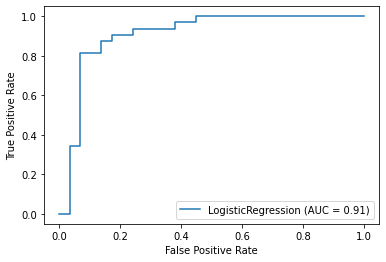

In [122]:
plot_roc_curve(log_reg_final,x_test_restecg,y_test)

### confusion matrix

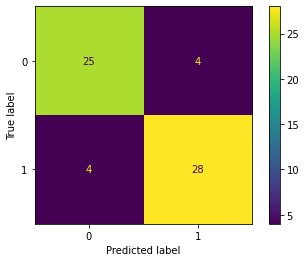

In [123]:
plot_confusion_matrix(log_reg_final,x_test_restecg,y_test)

as per above matrix:<br>
* True Negative = 25
* True Positive = 28
* False positive = 4
* False Negative = 4

### classification report

In [124]:
y_pred_log_reg_final=log_reg_final.predict(x_test_restecg)

In [125]:
print(classification_report(y_test,y_pred_log_reg_final))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, as this case is not having class imbalance we no need to consider this criteria much

In [126]:
disease_true=np.zeros(10000)
disease_true[0]=1
prediction=np.zeros(10000)
print(classification_report(disease_true,prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9999
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



### evaluation metrics by using [Scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html)

### accuracy_score_cros_val
accuracy is the fraction of predictions our model got right <BR>
$accuracy=\frac{TP+TN}{TP+TN+FP+FN}$

In [127]:
accuracy_score(y_test,y_pred_log_reg_final)

0.8688524590163934

In [128]:
log_acc_crs=np.mean(cross_val_score(log_reg_final,df[x_test_restecg.columns],df['target'],scoring='accuracy',cv=5))
log_acc_crs

0.8348087431693989

### Precision_score
Proportion of true positives over total number of positive samples. Higher precision leads to less false positives <br>
$Precision-score=\frac{TP}{(TP+FP)}$

In [129]:
precision_score(y_test,y_pred_log_reg_final)

0.875

In [130]:
log_prec_crs=np.mean(cross_val_score(log_reg_final,df[x_test_restecg.columns],df['target'],scoring='precision',cv=5))
log_prec_crs

0.8319661323396469

### recall_score or sensitivity
Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives. <br>
$recall-score=\frac{TP}{TP+FN}$

In [131]:
recall_score(y_test,y_pred_log_reg_final)

0.875

In [132]:
log_rec_crs=np.mean(cross_val_score(log_reg_final,df[x_test_restecg.columns],df['target'],scoring='recall',cv=5))
log_rec_crs

0.8787878787878789

### False negative rate
A false negative error, or false negative, is a test result which wrongly indicates that a condition does not hold.
Prediction is negative but actually it is present. <br>
in this case Heart disease is there but predicted as No heart disease<br>
$FNR=\frac{FN}{FN+TP}$

In [133]:
fnr_log_rec_crs=4/(4+28)
fnr_log_rec_crs

0.125

### Specificity
what percentage of patients without heart disease were correctly identified<br>
$Specificity = \frac{TN}{TN+FP}$

In [134]:
spec_log_rec_crs=25/(25+4)
spec_log_rec_crs

0.8620689655172413

## Model building with Linear SVC


In [135]:
linear_svc_clf=SVC(kernel='linear')
linear_svc_clf.fit(x_train,y_train)
linear_svc_clf.score(x_test,y_test)

0.8688524590163934

## evaluation of linear SVC model

1. ROC curve and AUC score
2. Confusion matrix 
3. Classification report
4. Precision
5. Recall
6. F1-score

### ROC curve and AUC score

ROC curve is a way of understanding how model is performing by comparing the true positive rate to the false positive rate <br>
* A false positive in this case occurs when the person tests positive, but does not actually have the disease. 
* A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

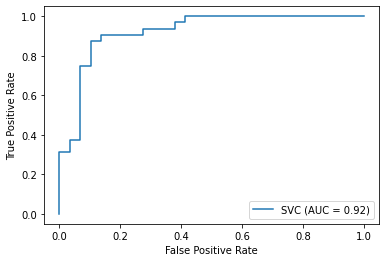

In [136]:
plot_roc_curve(linear_svc_clf,x_test,y_test)

### confusion matrix

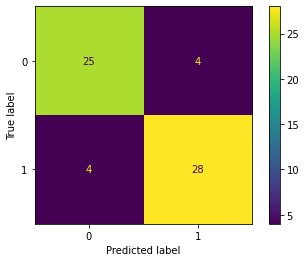

In [137]:
plot_confusion_matrix(linear_svc_clf,x_test,y_test);

as per above matrix:<br>
* True Negative = 25
* True Positive = 28
* False positive = 4
* False Negative = 4


exaclty same matrix as logistic regression

### classification report

In [138]:
y_pred_linear_svc_clf=linear_svc_clf.predict(x_test)

In [139]:
print(classification_report(y_test,y_pred_linear_svc_clf))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, as this case is not having class imbalance we no need to consider this criteria much

as per above report only `macro avg` captures this imbalance

### evaluation metrics by using [Scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html)

### accuracy_score_cros_val
accuracy is the fraction of predictions our model got right <BR>
$accuracy=\frac{TP+TN}{TP+TN+FP+FN}$

In [140]:
accuracy_score(y_test,y_pred_linear_svc_clf)

0.8688524590163934

In [141]:
acc_crs=np.mean(cross_val_score(linear_svc_clf,df.drop('target',axis=1),df['target'],scoring='accuracy',cv=5))
acc_crs

0.8283060109289618

### Precision_score
Proportion of true positives over total number of positive samples. Higher precision leads to less false positives <br>
$Precision-score=\frac{TP}{(TP+FP)}$

In [142]:
precision_score(y_test,y_pred_linear_svc_clf)

0.875

In [143]:
prec_crs=np.mean(cross_val_score(linear_svc_clf,df.drop('target',axis=1),df['target'],scoring='precision',cv=5))
prec_crs

0.8141444108337147

### recall_score or sensitivity
Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives. <br>
$recall-score=\frac{TP}{TP+FN}$

In [144]:
recall_score(y_test,y_pred_linear_svc_clf)

0.875

In [145]:
rec_crs=np.mean(cross_val_score(linear_svc_clf,df.drop('target',axis=1),df['target'],scoring='recall',cv=5))
rec_crs

0.890909090909091

### False negative rate
A false negative error, or false negative, is a test result which wrongly indicates that a condition does not hold.
Prediction is negative but actually it is present. <br>
in this case Heart disease is there but predicted as No heart disease<br>
$FNR=\frac{FN}{FN+TP}$

In [146]:
fnr_rec_crs=4/(4+28)
fnr_rec_crs

0.125

### Specificity
what percentage of patients without heart disease were correctly identified<br>
$Specificity = \frac{TN}{TN+FP}$

In [147]:
spec_rec_crs=25/(25+4)
spec_rec_crs

0.8620689655172413

## Model building with KNN

as discussed above we will use rescaled data for this KNN

In [ ]:
df_train,df_test

In [183]:
scaler=MinMaxScaler()

In [185]:
scaled_df_train=df_train.copy()
scaled_df_test=df_test.copy()

### fit transforming the train data

In [190]:
scaled_df_train[scaled_df_train.columns]=scaler.fit_transform(scaled_df_train[scaled_df_train.columns])
scaled_df_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
132,0.270833,1.0,0.333333,0.265306,0.378753,0.0,0.5,0.649123,0.0,0.000000,1.0,0.00,0.666667,1.0
202,0.604167,1.0,0.000000,0.571429,0.321016,0.0,0.0,0.201754,1.0,0.142857,1.0,0.00,1.000000,0.0
196,0.354167,1.0,0.666667,0.571429,0.230947,0.0,0.5,0.517544,0.0,0.642857,0.5,0.00,0.666667,0.0
75,0.541667,0.0,0.333333,0.418367,0.274827,0.0,0.0,0.640351,0.0,0.250000,0.5,0.00,0.666667,1.0
176,0.645833,1.0,0.000000,0.234694,0.228637,1.0,0.5,0.631579,1.0,0.250000,1.0,0.50,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.437500,1.0,0.666667,0.469388,0.235566,0.0,0.5,0.657895,0.0,0.107143,0.5,0.25,1.000000,0.0
71,0.458333,1.0,0.666667,0.000000,0.221709,0.0,0.5,0.578947,1.0,0.000000,1.0,0.25,1.000000,1.0
106,0.833333,1.0,1.000000,0.673469,0.237875,1.0,0.0,0.377193,0.0,0.017857,0.5,0.25,0.666667,1.0
270,0.354167,1.0,0.000000,0.265306,0.272517,0.0,0.0,0.491228,0.0,0.142857,1.0,0.00,1.000000,0.0


### transforming the test data

In [191]:
scaled_df_test[scaled_df_test.columns]=scaler.transform(scaled_df_test[scaled_df_test.columns])
scaled_df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,0.583333,1.0,0.000000,0.571429,0.334873,0.0,0.0,0.210526,1.0,0.107143,0.5,0.25,0.333333,0.0
228,0.625000,1.0,1.000000,0.775510,0.362587,0.0,0.0,0.622807,0.0,0.035714,0.5,0.00,1.000000,0.0
111,0.583333,1.0,0.666667,0.571429,-0.011547,1.0,0.5,0.745614,0.0,0.035714,1.0,0.25,1.000000,1.0
246,0.562500,0.0,0.000000,0.408163,0.642032,0.0,0.0,0.543860,1.0,0.339286,0.5,0.50,1.000000,0.0
60,0.875000,0.0,0.666667,0.163265,0.309469,1.0,0.0,0.368421,0.0,0.000000,1.0,0.25,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.833333,1.0,0.666667,0.469388,0.284065,0.0,0.0,0.508772,0.0,0.357143,0.5,0.75,1.000000,0.0
104,0.437500,1.0,0.666667,0.357143,0.150115,0.0,0.5,0.657895,0.0,0.000000,1.0,0.00,0.666667,1.0
300,0.812500,1.0,0.000000,0.510204,0.143187,1.0,0.5,0.464912,0.0,0.607143,0.5,0.50,1.000000,0.0
193,0.645833,1.0,0.000000,0.520408,0.348730,0.0,0.0,0.473684,1.0,0.500000,0.5,0.50,1.000000,0.0


## fitting KNN model with scaled train data

In [192]:
scaled_x_train=scaled_df_train.drop('target',axis=1)
scaled_y_train=scaled_df_train['target']
scaled_x_test=scaled_df_test.drop('target',axis=1)
scaled_y_test=scaled_df_test['target']

In [193]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(scaled_x_train,scaled_y_train)
knn_clf.score(scaled_x_test,scaled_y_test)

0.8360655737704918

straight away 68 to 83 of accuracy score after rescaling

## parameter tuning for KNN by using elbow method

In [195]:
def Elbow(K):
    test_error = []
    for i in K:
        clf = KNeighborsClassifier(n_neighbors = i)
        clf.fit(scaled_x_train,scaled_y_train)
        tmp = clf.predict(scaled_x_test)
        tmp = f1_score(tmp,scaled_y_test) #f1 score is average of precision and recall
        error = 1-tmp
        test_error.append(error)
    
    return test_error

### plotting elbow

Text(0.5, 1.0, 'Elbow Curve for test')

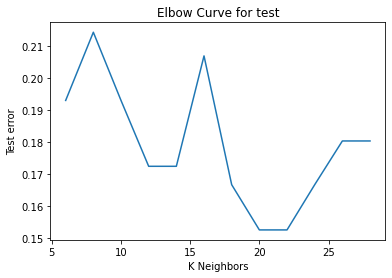

In [197]:
elbow = Elbow(range(6,30,2))
plt.plot(range(6,30,2), elbow)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

## building KNN by using n_neighbors from elbow

In [198]:
knn_clf1=KNeighborsClassifier(n_neighbors=20)
knn_clf1.fit(scaled_x_train,scaled_y_train)
knn_clf1.score(scaled_x_test,scaled_y_test)

0.8524590163934426

model accuracy jumped from 83 to 85 after parameter tuning

## evaluation of KNN

1. ROC curve and AUC score
2. Confusion matrix 
3. Classification report
4. Precision
5. Recall
6. F1-score

### ROC curve and AUC score

ROC curve is a way of understanding how model is performing by comparing the true positive rate to the false positive rate <br>
* A false positive in this case occurs when the person tests positive, but does not actually have the disease. 
* A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

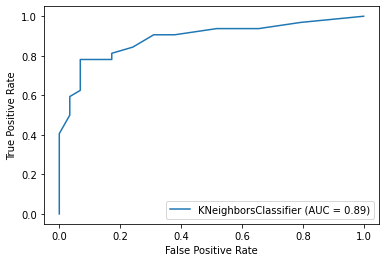

In [200]:
plot_roc_curve(knn_clf1,scaled_x_test,scaled_y_test)

### confusion matrix

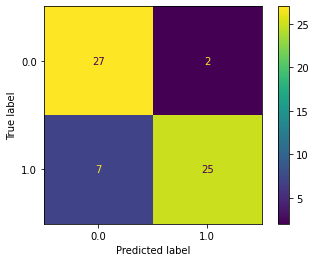

In [201]:
plot_confusion_matrix(knn_clf1,scaled_x_test,scaled_y_test);

as per above matrix:<br>
* True Negative = 27
* True Positive = 25
* False positive = 2
* False Negative = 7

### classification report

In [203]:
y_pred_knn_clf1=knn_clf1.predict(scaled_x_test)
print(classification_report(scaled_y_test,y_pred_knn_clf1))

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86        29
         1.0       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



### evaluation metrics by using [Scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html)

### accuracy_score_cros_val
accuracy is the fraction of predictions our model got right <BR>
$accuracy=\frac{TP+TN}{TP+TN+FP+FN}$

In [204]:
accuracy_score(scaled_y_test,y_pred_knn_clf1)

0.8524590163934426

In [218]:
knn_acc_crs=np.mean(cross_val_score(knn_clf1,scaled_x_train,scaled_y_train,scoring='accuracy',cv=5))
knn_acc_crs

0.7687074829931972

### Precision_score
Proportion of true positives over total number of positive samples. Higher precision leads to less false positives.<br>
$Precision-score=\frac{TP}{(TP+FP)}$

In [206]:
precision_score(scaled_y_test,y_pred_knn_clf1)

0.9259259259259259

In [219]:
knn_prec_crs=np.mean(cross_val_score(knn_clf1,scaled_x_train,scaled_y_train,scoring='precision',cv=5))
knn_prec_crs

0.7713445360653006

### recall_score or sensitivity
Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives. <br>
$recall-score=\frac{TP}{TP+FN}$

In [210]:
recall_score(scaled_y_test,y_pred_knn_clf1)

0.78125

In [221]:
knn_rec_crs=np.mean(cross_val_score(knn_clf1,scaled_x_train,scaled_y_train,scoring='recall',cv=5))
knn_rec_crs

0.825925925925926

### Specificity
what percentage of patients without heart disease were correctly identified<br>
$Specificity = \frac{TN}{TN+FP}$

In [213]:
spec_knn_rec_crs=27/(27+2)
spec_knn_rec_crs

0.9310344827586207

## Model building with RandomForestClassifier

In [148]:
rand_clf=RandomForestClassifier()
rand_clf.fit(x_train,y_train)
rand_clf.score(x_test,y_test)

0.8524590163934426

## Hyper parameter tuning by using GridSearchCV and check any increase in the score

In [149]:
grid={'n_estimators':[10,100,200,500,1000,1200],
      'max_depth':[None,5,10,20,30],
      'max_features':['auto','sqrt'],
      'min_samples_split':[2,4,6],
      'min_samples_leaf':[1,2,4]}

In [150]:
gs_rand_clf=RandomForestClassifier()
gs_rand_clf=GridSearchCV(estimator=gs_rand_clf,param_grid=grid,verbose=0)
gs_rand_clf.fit(x_train,y_train)
gs_rand_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

### building a Random Forest classification by using the best parameters from GridSearchCV

In [166]:
gs_rand_clf=RandomForestClassifier(n_estimators=10,max_depth=20,max_features='sqrt',min_samples_split=6,min_samples_leaf=2)
gs_rand_clf.fit(x_train,y_train)
gs_rand_clf.score(x_test,y_test)

0.8688524590163934

## evaluation of Random Forest Classifier

1. ROC curve and AUC score
2. Confusion matrix 
3. Classification report
4. Precision
5. Recall
6. F1-score

### ROC curve and AUC score

ROC curve is a way of understanding how model is performing by comparing the true positive rate to the false positive rate <br>
* A false positive in this case occurs when the person tests positive, but does not actually have the disease. 
* A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

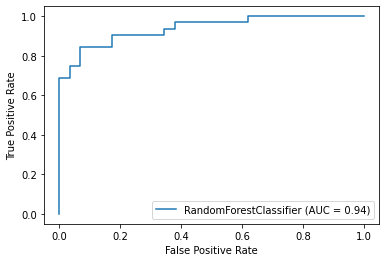

In [167]:
plot_roc_curve(gs_rand_clf,x_test,y_test)

### confusion matrix

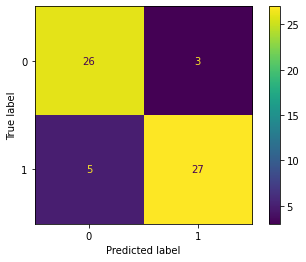

In [168]:
plot_confusion_matrix(gs_rand_clf,x_test,y_test);

as per above matrix:<br>
* True Negative = 26
* True Positive = 27
* False positive = 3
* False Negative = 5

### classification report

In [169]:
y_pred_gs_rand_clf=gs_rand_clf.predict(x_test)

In [170]:
print(classification_report(y_test,y_pred_gs_rand_clf))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### evaluation metrics by using [Scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html)

### accuracy_score_cros_val
accuracy is the fraction of predictions our model got right <BR>
$accuracy=\frac{TP+TN}{TP+TN+FP+FN}$

In [171]:
accuracy_score(y_test,y_pred_gs_rand_clf)

0.8688524590163934

In [172]:
rnd_acc_crs=np.mean(cross_val_score(gs_rand_clf,df.drop('target',axis=1),df['target'],scoring='accuracy',cv=5))
rnd_acc_crs

0.8118032786885244

### Precision_score
Proportion of true positives over total number of positive samples. Higher precision leads to less false positives.<br>
$Precision-score=\frac{TP}{(TP+FP)}$

In [173]:
precision_score(y_test,y_pred_gs_rand_clf)

0.9

In [174]:
rnd_prec_crs=np.mean(cross_val_score(gs_rand_clf,df.drop('target',axis=1),df['target'],scoring='precision',cv=5))
rnd_prec_crs

0.8187938205585263

### recall_score or sensitivity
Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives. <br>
$recall-score=\frac{TP}{TP+FN}$

In [175]:
recall_score(y_test,y_pred_gs_rand_clf)

0.84375

In [176]:
rnd_rec_crs=np.mean(cross_val_score(gs_rand_clf,df.drop('target',axis=1),df['target'],scoring='recall',cv=5))
rnd_rec_crs

0.8545454545454545

### False negative rate
A false negative error, or false negative, is a test result which wrongly indicates that a condition does not hold.
Prediction is negative but actually it is present. <br>
in this case Heart disease is there but predicted as No heart disease<br>
$FNR=\frac{FN}{FN+TP}$

In [177]:
fnr_rnd_rec_crs=3/(3+29)
fnr_rnd_rec_crs

0.09375

### Specificity
what percentage of patients without heart disease were correctly identified<br>
$Specificity = \frac{TN}{TN+FP}$

In [178]:
spec_rnd_rec_crs=26/(26+3)
spec_rnd_rec_crs

0.896551724137931


# Visualizing all metrics of all models

In [222]:
cv_metrics = pd.DataFrame({'ROC_AUC':[0.94,0.92,0.91,0.89],
                           'Accuracy': [rnd_acc_crs,acc_crs,log_acc_crs,knn_acc_crs],
                            'Precision': [rnd_prec_crs,prec_crs,log_prec_crs,knn_prec_crs],
                            'Recall or sensitivity': [rnd_rec_crs,rec_crs,log_rec_crs,knn_rec_crs],
                           'Specificity':[spec_rnd_rec_crs,spec_rec_crs,spec_log_rec_crs,spec_knn_rec_crs]},
                          index=['Random Forest Classifier','Linear SVC','Logistic Regression','KNN'])
cv_metrics

,ROC_AUC,Accuracy,Precision,Recall or sensitivity,Specificity
Random Forest Classifier,0.94,0.811803,0.818794,0.854545,0.896552
Linear SVC,0.92,0.828306,0.814144,0.890909,0.862069
Logistic Regression,0.91,0.834809,0.831966,0.878788,0.862069
KNN,0.89,0.768707,0.771345,0.825926,0.931034


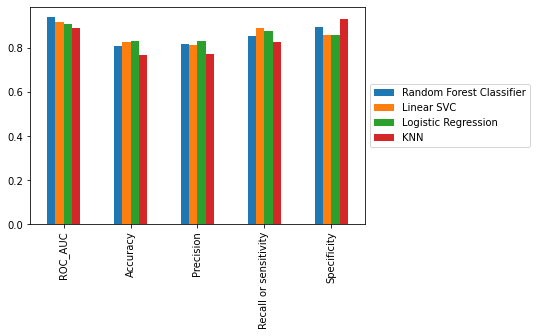

In [223]:
d=cv_metrics.T
f = plt.figure()
d.plot(kind='bar', ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Final Thoughts:
* almost 3 models are performing good except KNN but specificity wise `KNN` is doing it's job good.
* in this case identifying a diseased person as not diseased is the biggest error than identifying a person as diseased if he is not.
* so we will go with `random forest classifier` as our go to model in this case as it is consistently performing good in all the metrics